In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will input the training and testing data

In [3]:
# import the dataset
train_data = pd.read_csv('../input/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.shape

(891, 12)

In [6]:
test_data = pd.read_csv('../input/titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
test_data.shape

(418, 11)

Lets check the missing values in the dataset

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


we can see that in our data there are missing values in 'Age' , 'Fare' and 'Cabin' columns

We will check for duplicated values as well

In [10]:
train_data.duplicated().sum()

0

In [11]:
test_data.duplicated().sum()

0

We can see there are no duplicate values in our dataset

Let us see how many passangers survived.

In [12]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

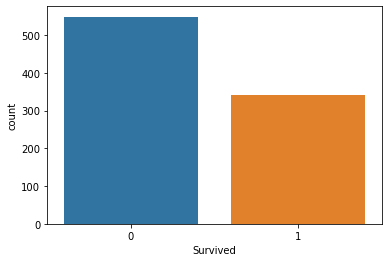

In [13]:
import seaborn as sns
sns.countplot(x='Survived', data=train_data)

we can see that in our training data only 38% of people survived.

### Feature Analysis
Here we'll see how our data used to perform a more precise feature selection in the modeling part.
We will thus explore one feature at a time in order to determine its importance in predicting if a passenger survived or not.

### Sex

In [14]:
train_data['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [15]:
train_data.groupby('Sex').Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


We can see that that in our data 74% of females survived where as only 18% of males survived.

Text(0.5, 1.0, 'Survival by Sex')

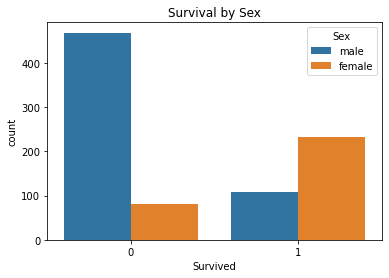

In [16]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Sex')

1. We see that around 65% of the passengers were male while the remaining 35% were female.
2. The important thing to notice here is that the survival rate for women was four times the survival rate for men and this makes Sex one of the most informative features.

### Pclass

In [18]:
train_data['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


In [19]:
# train_data['Pclass'].value_counts(normalize=True)
train_data.groupby('Pclass').Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


We can see from the above that the no of Class 1 category people survived the most compared to the no of Class 2 category people.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

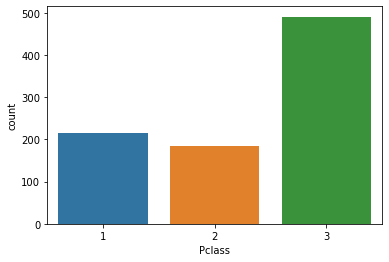

In [20]:
sns.countplot(x='Pclass', data=train_data)

Text(0.5, 1.0, 'Survival according to the Pclass')

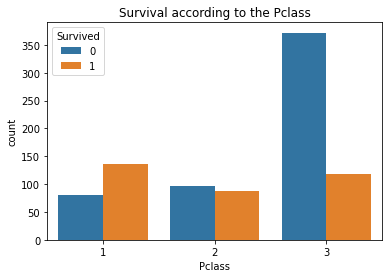

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival according to the Pclass')

1. There were three classes on the ship and from the plot we see that the number of passengers in the third class was higher than the number of passengers in the first and second classes combined.
2. However, the survival rate by class is not the same, more than 60% of first-class passengers and around half of the second class passengers were rescued, whereas 75% of third class passengers were not able to survive the disaster.
3. For this reason, this is definitely an important aspect to consider

### Pclass & Sex

In [22]:
train_data['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


Text(0.5, 1.0, 'Survival rate according to Pclass & Sex')

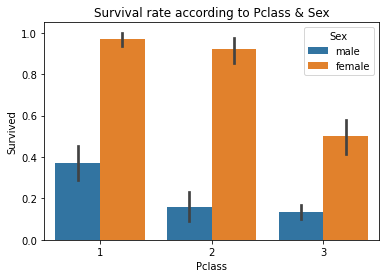

In [23]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.title('Survival rate according to Pclass & Sex')

1. We can also see the survival rate by Sex and Pclass, which is quite impressive. First class and second class women who were rescued were respectively 97% and 92%, while the percentage drops to 50% for third-class women.
2. Despite that, this is still more than the 37% survival rate for first-class men.

In [24]:
train_data.groupby(['Pclass','Sex']).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

## Age,Pclass,Survived

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

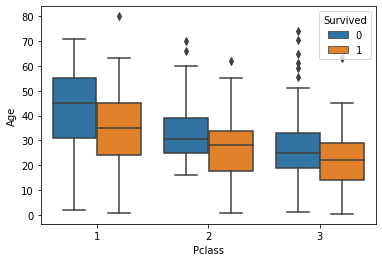

In [25]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data)

1. Another interesting thing to look at is the relation between Age, Pclass and Survived.
2. We see the influence of Pclass is the important one as there are no super clear horizontal patterns.
3. Also, we note that there were not many children in the first class.

### Fare


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

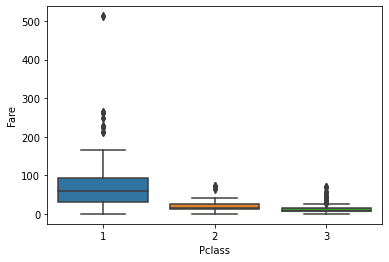

In [27]:
sns.boxplot(x='Pclass', y='Fare', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

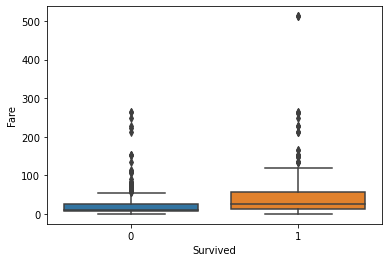

In [28]:
sns.boxplot(x='Survived', y='Fare',data=train_data)

1. From the description, we see that the Fare distribution is positively skewed, with 75% of data under 31 and a goes to 500.
2. At a first look, we notice that the higher the fare, the higher the possibility of surviving.

In [29]:
train_data[train_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


There are almost 15 such passengers are present. Since some of them are 1st or 2nd class passengers, we should remove zero-Fares that might confuse our model.
With the help of this function, we are going to set null values every time we encounter a zero value for Fare.

In [30]:
def remove_zero_fares(row):
    if row.Fare == 0:
        row.Fare = np.NaN
    return row

In [31]:
train_data = train_data.apply(remove_zero_fares, axis=1)
test_data = test_data.apply(remove_zero_fares, axis=1)

In [32]:
train_data[train_data['Fare'] == 0]
test_data[test_data['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


We can see that we have made the rows with Fare as 0 to NULL

### Embarked ,Pclass

Embarked tells us where a passenger boarded from.

There are three possible values for it: Southampton, Cherbourg and Queenstown.

In [33]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

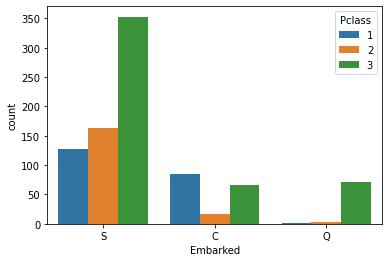

In [34]:
sns.countplot(x='Embarked', hue='Pclass', data=train_data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

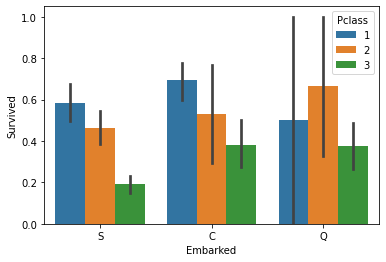

In [35]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train_data)

## Name

1. The Name column contains useful information as for example we could identify family groups using surnames.
2. In this notebook, however, we extracted only the passengers' title from it, creating a new feature for both train and test data.

In [36]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [37]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Sir               1
the Countess      1
Mme               1
Capt              1
Ms                1
Lady              1
Jonkheer          1
Name: Title, dtype: int64

In [38]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

1. Looking at the distribution of the titles, it might be convenient to move the really low-frequency ones into bigger groups.
2. After analyzing them, we can substitute all rare female titles with Miss and all rare male titles with Mr

In [39]:
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [40]:
train_data['Title'].value_counts()

Mr        525
Miss      188
Mrs       125
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

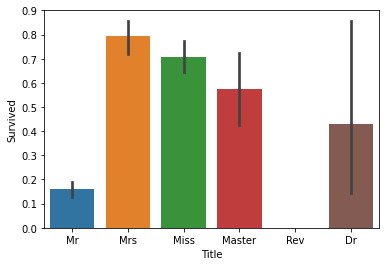

In [41]:
sns.barplot(x='Title', y='Survived', data=train_data)

Here is the final result. We have relatively high hopes for this new feature since the survival rate in most cases appears to be either significantly above or below the average survival rate, which should help our model.

### Cabin and Ticket

1. The Cabin feature is somewhat problematic as there are many missing values.
2. We can not expect it to help our model too much.
3. On the other side, a correctly engineered Ticket column is the best way to find family groups.
4. Since it is a pity to delete it knowing its full potential, we can create two new columns; one for the ticket first two letters and the second one for the ticket length.

In [44]:
# Extract the first two letters
train_data['Ticket_lett'] = train_data.Ticket.apply(lambda x: x[:2])
test_data['Ticket_lett'] = test_data.Ticket.apply(lambda x: x[:2])

In [45]:
# Calculate ticket length
train_data['Ticket_len'] = train_data.Ticket.apply(lambda x: len(x))
test_data['Ticket_len'] = test_data.Ticket.apply(lambda x: len(x))

### Family Size
Since we have two seemingly weak predictors, one thing we can do is combine them to get a stronger one.
In the case of SibSp and Parch, we can join the two variables to get a family size feature, which is the sum of SibSp, Parch and 1 (who is the passenger himself).
Creation of a new Fam_size column

In [46]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

<AxesSubplot:xlabel='Fam_size', ylabel='Survived'>

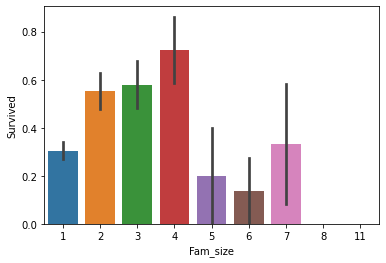

In [47]:
sns.barplot(x='Fam_size', y='Survived', data=train_data)

Plotting the survival rate by family size it is clear that people who were alone had a lower chance of surviving than families up to 4 components, while the survival rate drops for bigger families and ultimately becomes zero for very large ones.



### Family Type
To further summarize the previous trend, as our final feature, Let's create four groups for family size.

In [48]:
# Creation of four groups
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

<AxesSubplot:xlabel='Fam_type', ylabel='Survived'>

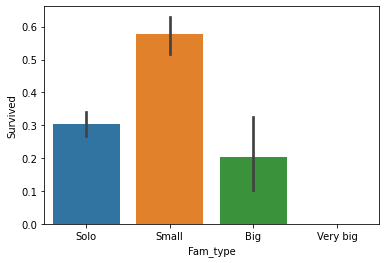

In [49]:
sns.barplot(x='Fam_type', y='Survived', data=train_data)

<AxesSubplot:xlabel='Fam_type', ylabel='count'>

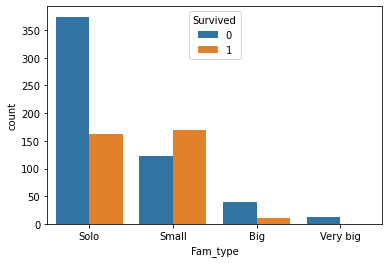

In [50]:
sns.countplot(x='Fam_type', hue='Survived', data=train_data)

### Modeling
1. We start by selecting the features we will use and isolating the target.
2. We will not consider Cabin and in the end, we also excluded Age as the relevant information which is being a young man is encoded in the Master title.
3. We also did not use Sex as it is not useful given the Title column: adult males and young children have the same sex but are really different categories as we saw before, so we don't want to confuse our algorithm.
4. If you don't extract the Title column, remember to put Sex in your models as it is pretty important!

In [51]:
Y=train_data['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']
X=train_data[features]
X.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_lett
0,3,7.2500,Mr,S,Small,9,A/
1,1,71.2833,Mrs,C,Small,8,PC
2,3,7.9250,Miss,S,Solo,16,ST
3,1,53.1000,Mrs,S,Small,6,11
4,3,8.0500,Mr,S,Solo,6,37


Now we will clear the missing values

In [52]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

In [54]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [55]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [56]:
# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(solver='liblinear'))
])

In [57]:
# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Title',
                                                   'Embarked', 'Fam_type',
                                                   'Ticket_len',
                                                   'Ticket_lett'])])),
                ('model', LogisticRegression(solver='

In [58]:
print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, Y, cv=10).mean()))

Cross validation score: 0.834


Now we will test our model on test data

In [59]:
X_test = test_data[features]
X_test.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_lett
0,3,7.8292,Mr,Q,Solo,6,33
1,3,7.0000,Mrs,S,Small,6,36
2,2,9.6875,Mr,Q,Solo,6,24
3,3,8.6625,Mr,S,Solo,6,31
4,3,12.2875,Mrs,S,Small,7,31


In [60]:
# Preprocessing of test data, get predictions
predictions = titanic_pipeline.predict(X_test)

Submission File

In [61]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
